### 【問題1】仮定関数

In [21]:
class ScratchLinearRegression():
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter   # 繰り返し回数
        self.lr = lr           # 学習率 
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    # 単回帰では1次関数のこと
    def _linear_hypothesis(self, x):
#         self.coef_ = [100, 10] # 仮
        self.coef_ = [100] # 仮
        theta = self.coef_
        return np.dot(x, theta) # 内積
    
    # パラメータの更新式
    # error: 誤差
    def _gradient_descent(self, x, y):
        m = len(y)
        hypothesis = self._linear_hypothesis(x)  # 仮説のy
        diff = hypothesis - y.reshape(m, 1)      # 仮説関数との差分
        sqr_errors = np.square(diff)             # 差分の2乗を求める
        j = self.lr * (1/m) * np.sum(sqr_errors) # 
        
import numpy as np    
hoge = ScratchLinearRegression(10, 0.1, False, False)
x = np.array([[1, 2],[2, 4]])
y = np.array([2, 8])

a = hoge._linear_hypothesis(x)

b = hoge._gradient_descent
display(a) 


array([100, 200])

### 【問題2】最急降下法

theta: 
 [[-3.04638561]
 [ 1.09496772]]


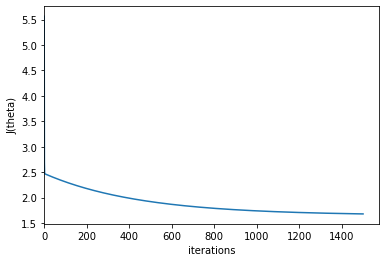

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
# 線形回帰でデータに直線を当てはめる
# 目的関数
def compute_cost(x, y, theta):
    m = len(y)
    hypothesis = np.dot(x, theta)
    diff = hypothesis - y.reshape(m, 1)
    sqr_errors = np.square(diff)
    j = 1 / (2 * m) * np.sum(sqr_errors)
    return j

# 最急降下法でJ(θ)の値を最小化する.
# イテレーション毎にcompute_cost()を呼び出し, コストを出力する.
def gradient_descent(x, y, theta, alpha, num_iters):
    m = len(y)
    j_history = np.zeros((num_iters, 1))
    for i in range(0, num_iters):
        hypothesis = np.dot(x, theta)
        diff = hypothesis - y.reshape(m, 1)
        theta = theta - alpha / m * np.dot(x.T, diff)
        j_history[i] = compute_cost(x, y, theta)
    return theta, j_history

if __name__ == '__main__':
    # X: 利益(1万ドル単位), y: 都市の人口(1万人単位)
    X = np.array([8.51, 18.95, 6.35,  5.71, 11.7, 10.23,  13.17, 7.22, 10.95, 12.82])
    y = np.array([4.24, 17.05, 5.49,  3.25,  8.00, 7.77, 14.69, 3.34, 7.04, 13.5])
    m = len(X)      # トレーニングデータの数
    intercept_term = np.ones((m, 1))
    X = np.hstack((intercept_term, X.reshape(m, 1)))   # 1列目に切片項を追加
    theta = np.zeros((2, 1))      # thetaを0で初期化
    iterations = 1500
    alpha = 0.01        # 学習率
    theta, j_history = gradient_descent(X, y, theta, alpha, iterations)
    print('theta: \n', theta)

    # 勾配降下が正しく機能していることを確認するため各ステップで値が減少していることを確認する.
    plt.figure()
    plt.plot(j_history)
    plt.xlim(0,)
    plt.xlabel('iterations')
    plt.ylabel('J(theta)')

#     plt.figure()
#     plt.scatter(X[:, 1], y, color='red', marker='x', alpha=0.5)
#     plt.ylabel('利益(1万ドル単位)')
#     plt.xlabel('都市の人口(1万人単位)')
#     plt.plot(X[:, 1], np.dot(X, theta))
#     plt.show()
    # コスト関数J(θ)はボウル型でグローバルな最小値を持つ(等高線プロットで確認).
    # 勾配降下の各ステップはこのポイントに近づく.
#     theta0_vals = np.linspace(-10, 10, 100)
#     theta1_vals = np.linspace(-1, 4, 100)
#     t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
#     j_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
#     t = np.array([t0, t1])
#     for i in range(len(theta0_vals)):
#         for j in range(len(theta1_vals)):
#             j_vals[i, j] = compute_cost(X, y, t[:, i, j].reshape(2, 1))
#     fig = plt.figure(figsize=(9, 4))
#     fig.suptitle('Cost function J(θ)')
#     plt.subplots_adjust(wspace=0.5, hspace=0.5)
#     # J(theta)の3次元プロット
#     ax1 = fig.add_subplot(121, projection='3d')
#     ax1.plot_surface(t0, t1, j_vals, cmap=cm.coolwarm)
#     ax1.set_title('Surface')
#     ax1.set_xlabel(r'$\rmθ_0$')
#     ax1.set_ylabel(r'$\rmθ_1$')
#     ax1.set_zlabel(r'$\rmJ(θ_0, θ_1)$')
#     # 等高線の描画
#     ax2 = fig.add_subplot(122)
#     ax2.contour(t0, t1, j_vals, levels=np.logspace(-2, 3, 20))
#     ax2.plot(theta[0], theta[1], 'x', color='red')
#     ax2.set_title('Contour, showing minimum')
#     ax2.set_xlabel('θ0')
#     ax2.set_ylabel('θ1')
#     plt.show()

### 【問題3】推定

### 【問題4】平均二乗誤差

### 【問題5】目的関数

### 【問題6】学習と推定

### 【問題7】学習曲線のプロット

### 【問題8】（アドバンス課題）バイアス項の除去

### 【問題9】（アドバンス課題）特徴量の多次元化

### 【問題10】（アドバンス課題）更新式の導出

### 【問題11】（アドバンス課題）局所最適解の問題